In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic/'

/content/drive/My Drive/results/synthetic


In [4]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main  #Temporarily installed, only for this session.

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=9991 sha256=5390fe5e00a81ffb18a0ce0bec86012f53a82b1738d26d1f3bd78d847ea78199
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfkkp8kc/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [5]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [6]:
ls

cnn_deep_exponential_results.pickle     cnn_shallow_relu_results.pickle
cnn_deep_relu_results.pickle            model_params/
cnn_shallow_exponential_results.pickle  Plot_notebook.ipynb


In [7]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [8]:
results={}

In [9]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [10]:
for keys in results['deep_relu']:
    print(keys)

auc
angles
saliency
intgrad
smoothgrad
expintgrad


In [11]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

(50,)


# Saliency

In [12]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['saliency']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['saliency']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['saliency']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['saliency']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_adj_scores']), axis=-1)

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['angles'])

scores_saliency = {}
scores_saliency['deep_relu']=np.array(results['deep_relu']['saliency']['scores'])
scores_saliency['deep_exp']=np.array(results['deep_exp']['saliency']['scores'])
scores_saliency['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores'])
scores_saliency['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

scores_intgrad = {}
scores_intgrad['deep_relu']=np.array(results['deep_relu']['intgrad']['scores'])
scores_intgrad['deep_exp']=np.array(results['deep_exp']['intgrad']['scores'])
scores_intgrad['shallow_relu']=np.array(results['shallow_relu']['intgrad']['scores'])
scores_intgrad['shallow_exp']=np.array(results['shallow_exp']['intgrad']['scores'])


scores_times_input = {}
scores_times_input['deep_relu']=np.array(results['deep_relu']['saliency']['scores_times_input'])
scores_times_input['deep_exp']=np.array(results['deep_exp']['saliency']['scores_times_input'])
scores_times_input['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores_times_input'])
scores_times_input['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

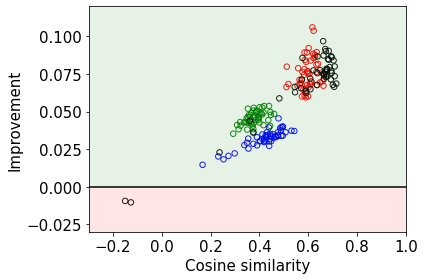

In [13]:
# Saliency Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity')

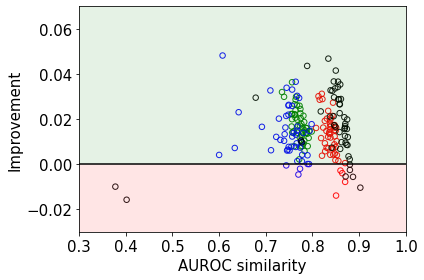

In [14]:
#Saliency AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity')

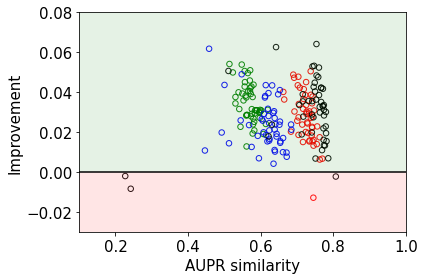

In [16]:
#Saliency AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity')

Interpretability vs Performance


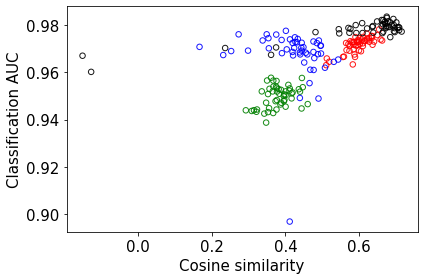

In [18]:
# Saliency Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity')

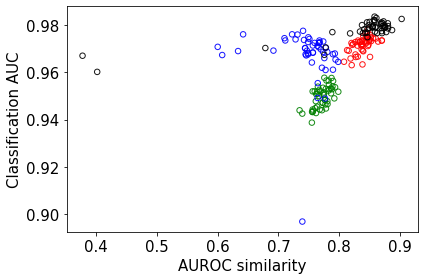

In [19]:
# SaliencyAUROC
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity')

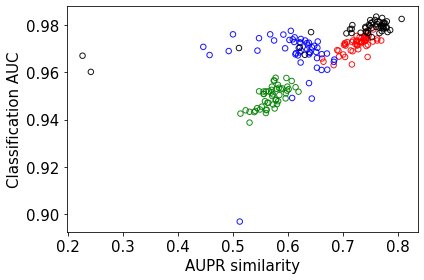

In [20]:
# SaliencyAUPR
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity')

# ANGLE STATISTICS

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

sine = np.array(Angles['deep_exp'])
improvement =np.array(Improvement['deep_exp'])
print(sine.shape)

(50, 500, 200)


(array([3.80683152e-06, 2.12095805e-05, 4.89449767e-05, 1.04959783e-04,
        1.45203431e-04, 2.16989397e-04, 3.46966983e-04, 4.56275949e-04,
        5.65586397e-04, 6.91758625e-04, 8.40222100e-04, 8.94605407e-04,
        1.00826652e-03, 1.19534510e-03, 1.23776936e-03, 1.37372235e-03,
        1.48031363e-03, 1.59506581e-03, 1.69295597e-03, 1.82999829e-03,
        2.11768599e-03, 2.30531332e-03, 2.45269240e-03, 2.64683557e-03,
        2.81379233e-03, 3.25647940e-03, 3.64042637e-03, 4.16739285e-03,
        4.77974889e-03, 5.52100516e-03, 6.01915732e-03, 6.49391074e-03,
        7.26072313e-03, 8.09659545e-03, 8.90527610e-03, 9.56222715e-03,
        1.05530921e-02, 1.09778262e-02, 1.15075201e-02, 1.18653627e-02,
        1.24010388e-02, 1.32630152e-02, 1.41603407e-02, 1.45551639e-02,
        1.49238832e-02, 1.57907540e-02, 1.62105936e-02, 1.63166411e-02,
        1.65597348e-02, 1.68838596e-02, 1.60702845e-02, 1.57211433e-02,
        1.54280170e-02, 1.50636484e-02, 1.48265369e-02, 1.370297

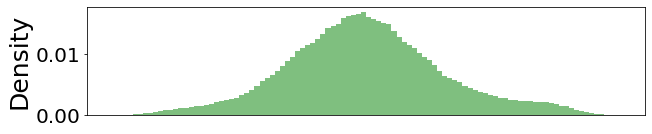

In [22]:
import matplotlib.pyplot as plt

sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
improvement_flattened = np.array(improvement.reshape(len(improvement)*len(improvement[0])*len(improvement[0,0]),))
index = np.where(np.abs(improvement_flattened)>0)[0]  #No NAs
sine_flattened=sine_flattened[index]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

(-0.75, 1.0)

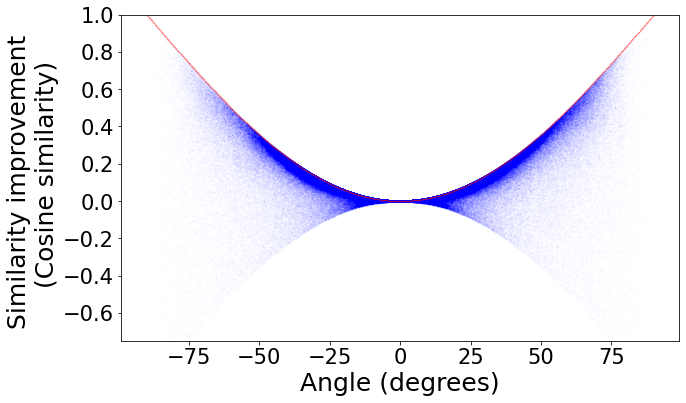

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)  #plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Similarity improvement \n (Cosine similarity)', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

#Highlight bins
sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
bin_map=np.linspace(-90,90,1000)
bin_points = 1-np.abs(np.cos(bin_map/180*3.1416))
plt.scatter(bin_map, bin_points, s=0.1, c='red', marker="o", label='zadaca', alpha=0.5)

plt.ylim(-0.75,1)           
#
#plt.savefig('drive/My Drive/results/U_scatter.pdf', dpi='figure')  
#plt.show()

In [24]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)

-0.27309933
34.97127
(5000000,)


# ANECDOTAL (last...)

In [25]:
! pip install logomaker
import logomaker

     |████████████████████████████████| 11.8 MB 10.5 MB/s 


In [24]:
saliency_map_raw #=Scores, of interest. 
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

NameError: ignored

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

In [25]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''

NameError: ignored

# Integrated gradient

In [26]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['intgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['intgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['intgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['intgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['intgrad']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['intgrad']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['intgrad']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['intgrad']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['intgrad']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_adj_scores']), axis=-1)

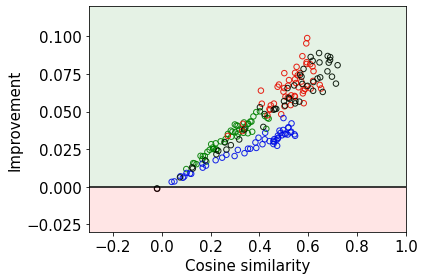

In [27]:
# IG Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity')

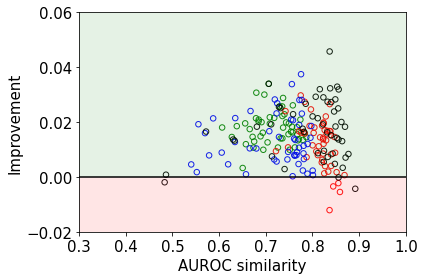

In [30]:
#IG AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.06, x_label = 'AUROC similarity')

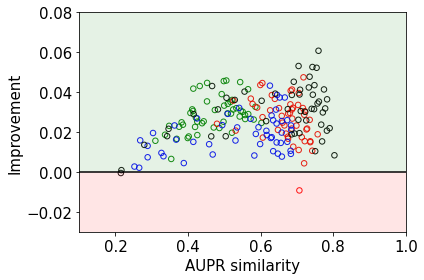

In [31]:
#IG AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity')

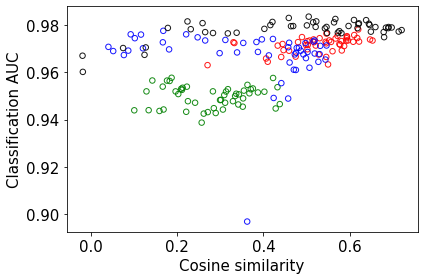

In [32]:
# IG Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity')

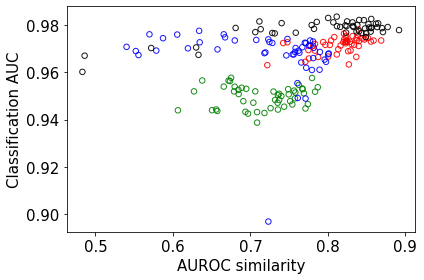

In [33]:
# IG AUROC
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity')

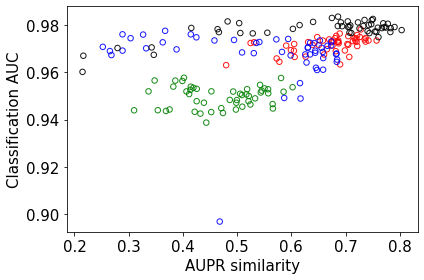

In [34]:
# IG AUPR
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity')

In [35]:
scores_saliency_onerun= np.array(scores_saliency['deep_relu'][0])
scores_intgrad_onerun= np.array(scores_intgrad['deep_relu'][0])

In [36]:
!pip install logomaker 

import logomaker

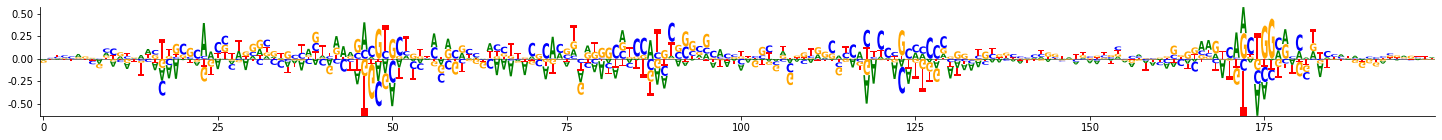

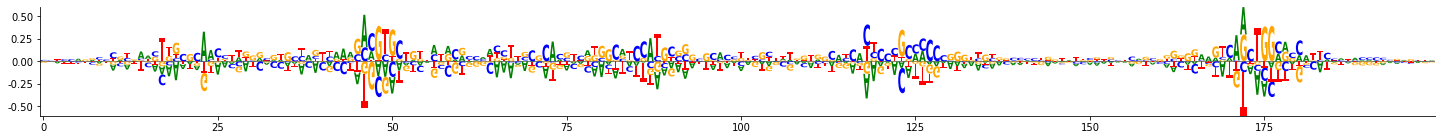

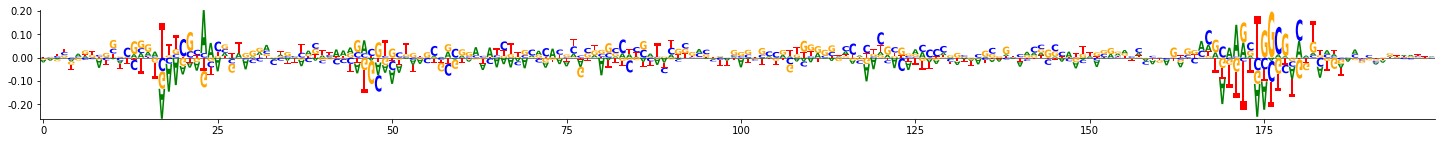

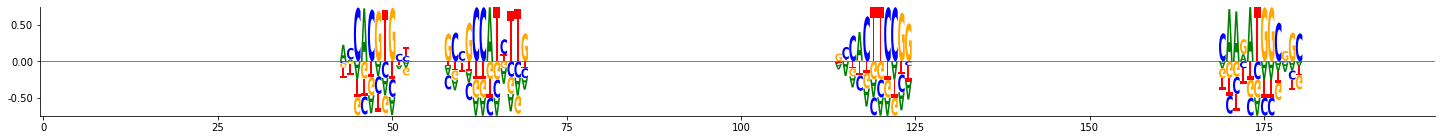

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
s=22 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_saliency_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores_saliency_onerun[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_saliency_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (scores_saliency_onerun-0.25*np.sum(scores_saliency_onerun, axis=-1, keepdims=True))[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()



# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_intgrad_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores_intgrad_onerun[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = X_model_centered.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


In [38]:
# Needed for X_model_centered in Logomaker plots

"""
Evaluate models on synthetic data: classification and interpretability performance.
""" 
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from gradient_correction import helper, explain, model_zoo, geomath

#------------------------------------------------------------------------

num_trials = 50  
model_names = ['cnn_deep', 'cnn_shallow'] 
activations = ['relu', 'exponential']  
attr_methods = ['saliency', 'intgrad'] #['saliency', 'smoothgrad', 'intgrad', 'expintgrad']

results_path = os.path.join('../results', 'synthetic')  
params_path = os.path.join(results_path, 'model_params')  

#------------------------------------------------------------------------

# load data
data_path = '../data/synthetic_code_dataset.h5'
x_train, y_train, x_valid, y_valid, x_test, y_test = helper.load_data(data_path)  

# get shapes
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]  
X_model = test_model[true_index][:500]  
X_model_centered =  X_model - 0.25

# Smoothgrad

In [60]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['smoothgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['smoothgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)

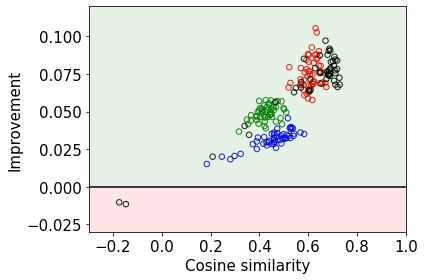

In [61]:
# SG Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity')

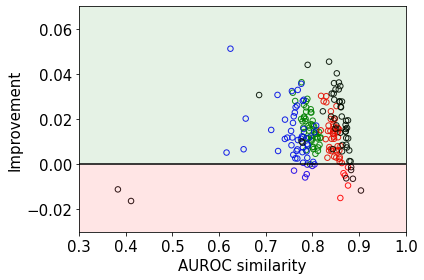

In [62]:
#SG AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity')

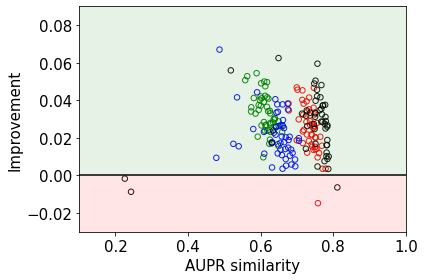

In [63]:
#SG AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity')

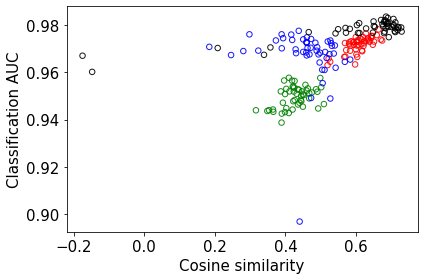

In [64]:
# SG Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity')

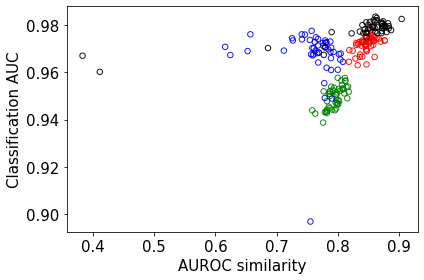

In [65]:
# SG AUROC
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity')

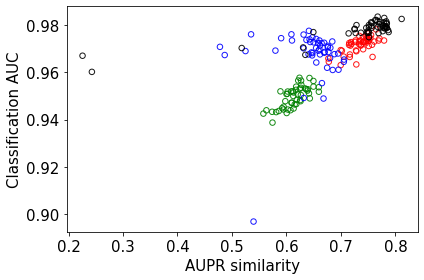

In [66]:
# SG AUPR
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity')

# Expintgrad

In [67]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['expintgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['expintgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_adj_scores']), axis=-1)

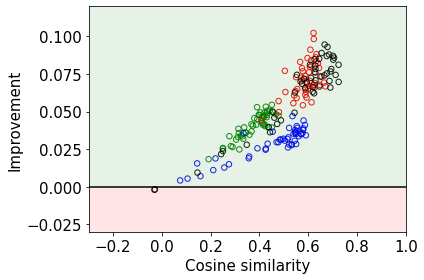

In [69]:
# EG Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity')

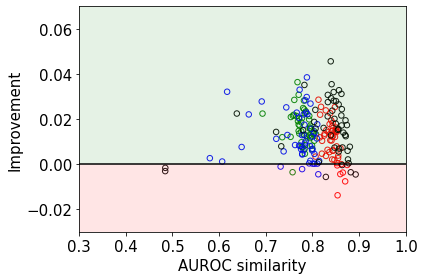

In [70]:
#EG AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity')

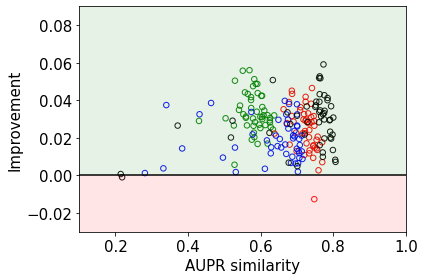

In [71]:
#EG AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity')

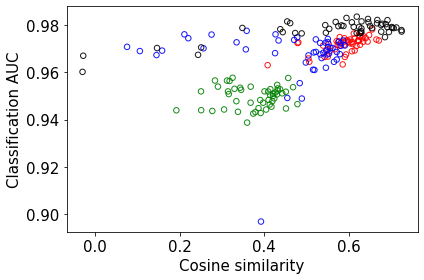

In [72]:
# EG Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity')

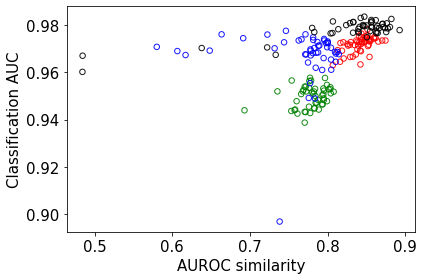

In [73]:
# EG AUROC
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity')

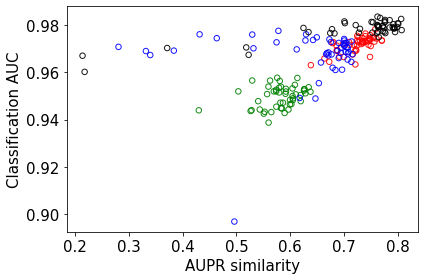

In [74]:
# EG AUPR
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity')